In [ ]:
# The following script is used to forecast future cases in covid all over the world.
# It uses fbprophet Time Series algorithm for predecting the future trend. 
# Fbprophet used two values(d and y), Date and the series data to predict the future.

In [7]:
import pandas as pd
from fbprophet import Prophet

# world data for covid cases
df = pd.read_csv('s3://geneseaiml1/owid-covid-data.csv')
df = df[['date', 'total_cases']].copy()
df.head()
df.fillna(0,inplace=True)

# Taking last 3000 rows since the data size is huge
df = df[-3000:]
df.head()

# we take two columns, date and total_cases as d and y
df.rename(columns={'date':'ds', 'total_cases':'y'}, inplace=True)

# creating prophet object
pro = Prophet()

# fitting historical data
pro.fit(df)

# Make dataframe for future dates to predict cases
future = pro.make_future_dataframe(periods=365)


# The predict method will assign each row in future a predicted value which it names yhat.
forecast = pro.predict(future)
forecast[['ds', 'yhat']].tail()


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



,ds,yhat
3360,2021-10-09,8.702657e+06
3361,2021-10-10,8.720626e+06
3362,2021-10-11,8.737305e+06
3363,2021-10-12,8.755232e+06
3364,2021-10-13,8.769412e+06


In [23]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(pro, forecast)

# The blue line is the predicted total cases for the given timeframe
# This is the interactive plot

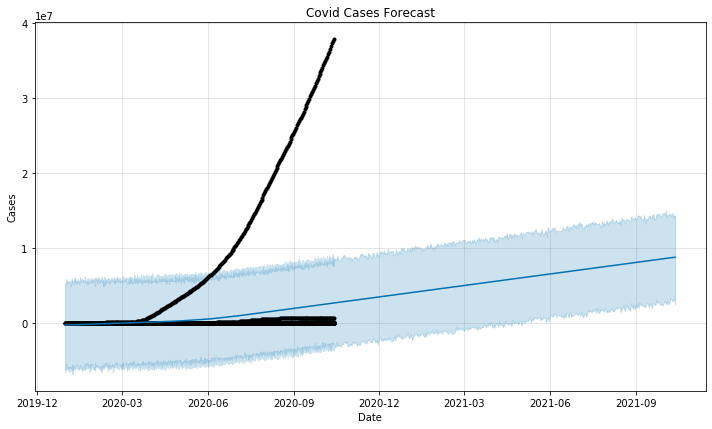

In [26]:
# Draw forecast results and labeling it. However it is not interactive
pro.plot(forecast, xlabel = 'Date', ylabel = 'Covid Cases')

import matplotlib.pyplot as plt
# labeling the graph
plt.title('Covid Cases Forecast')
plt.ylabel('Cases')
plt.show()
